## Question 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
miu0= 0.5
beta0= 3
x = np.random.normal(0, (0.02)**0.5, 1000)
e = np.random.normal(0, (0.05)**0.5, 1000)

e.shape

(1000,)

Text(0.5, 1.0, 'Distribution of X')

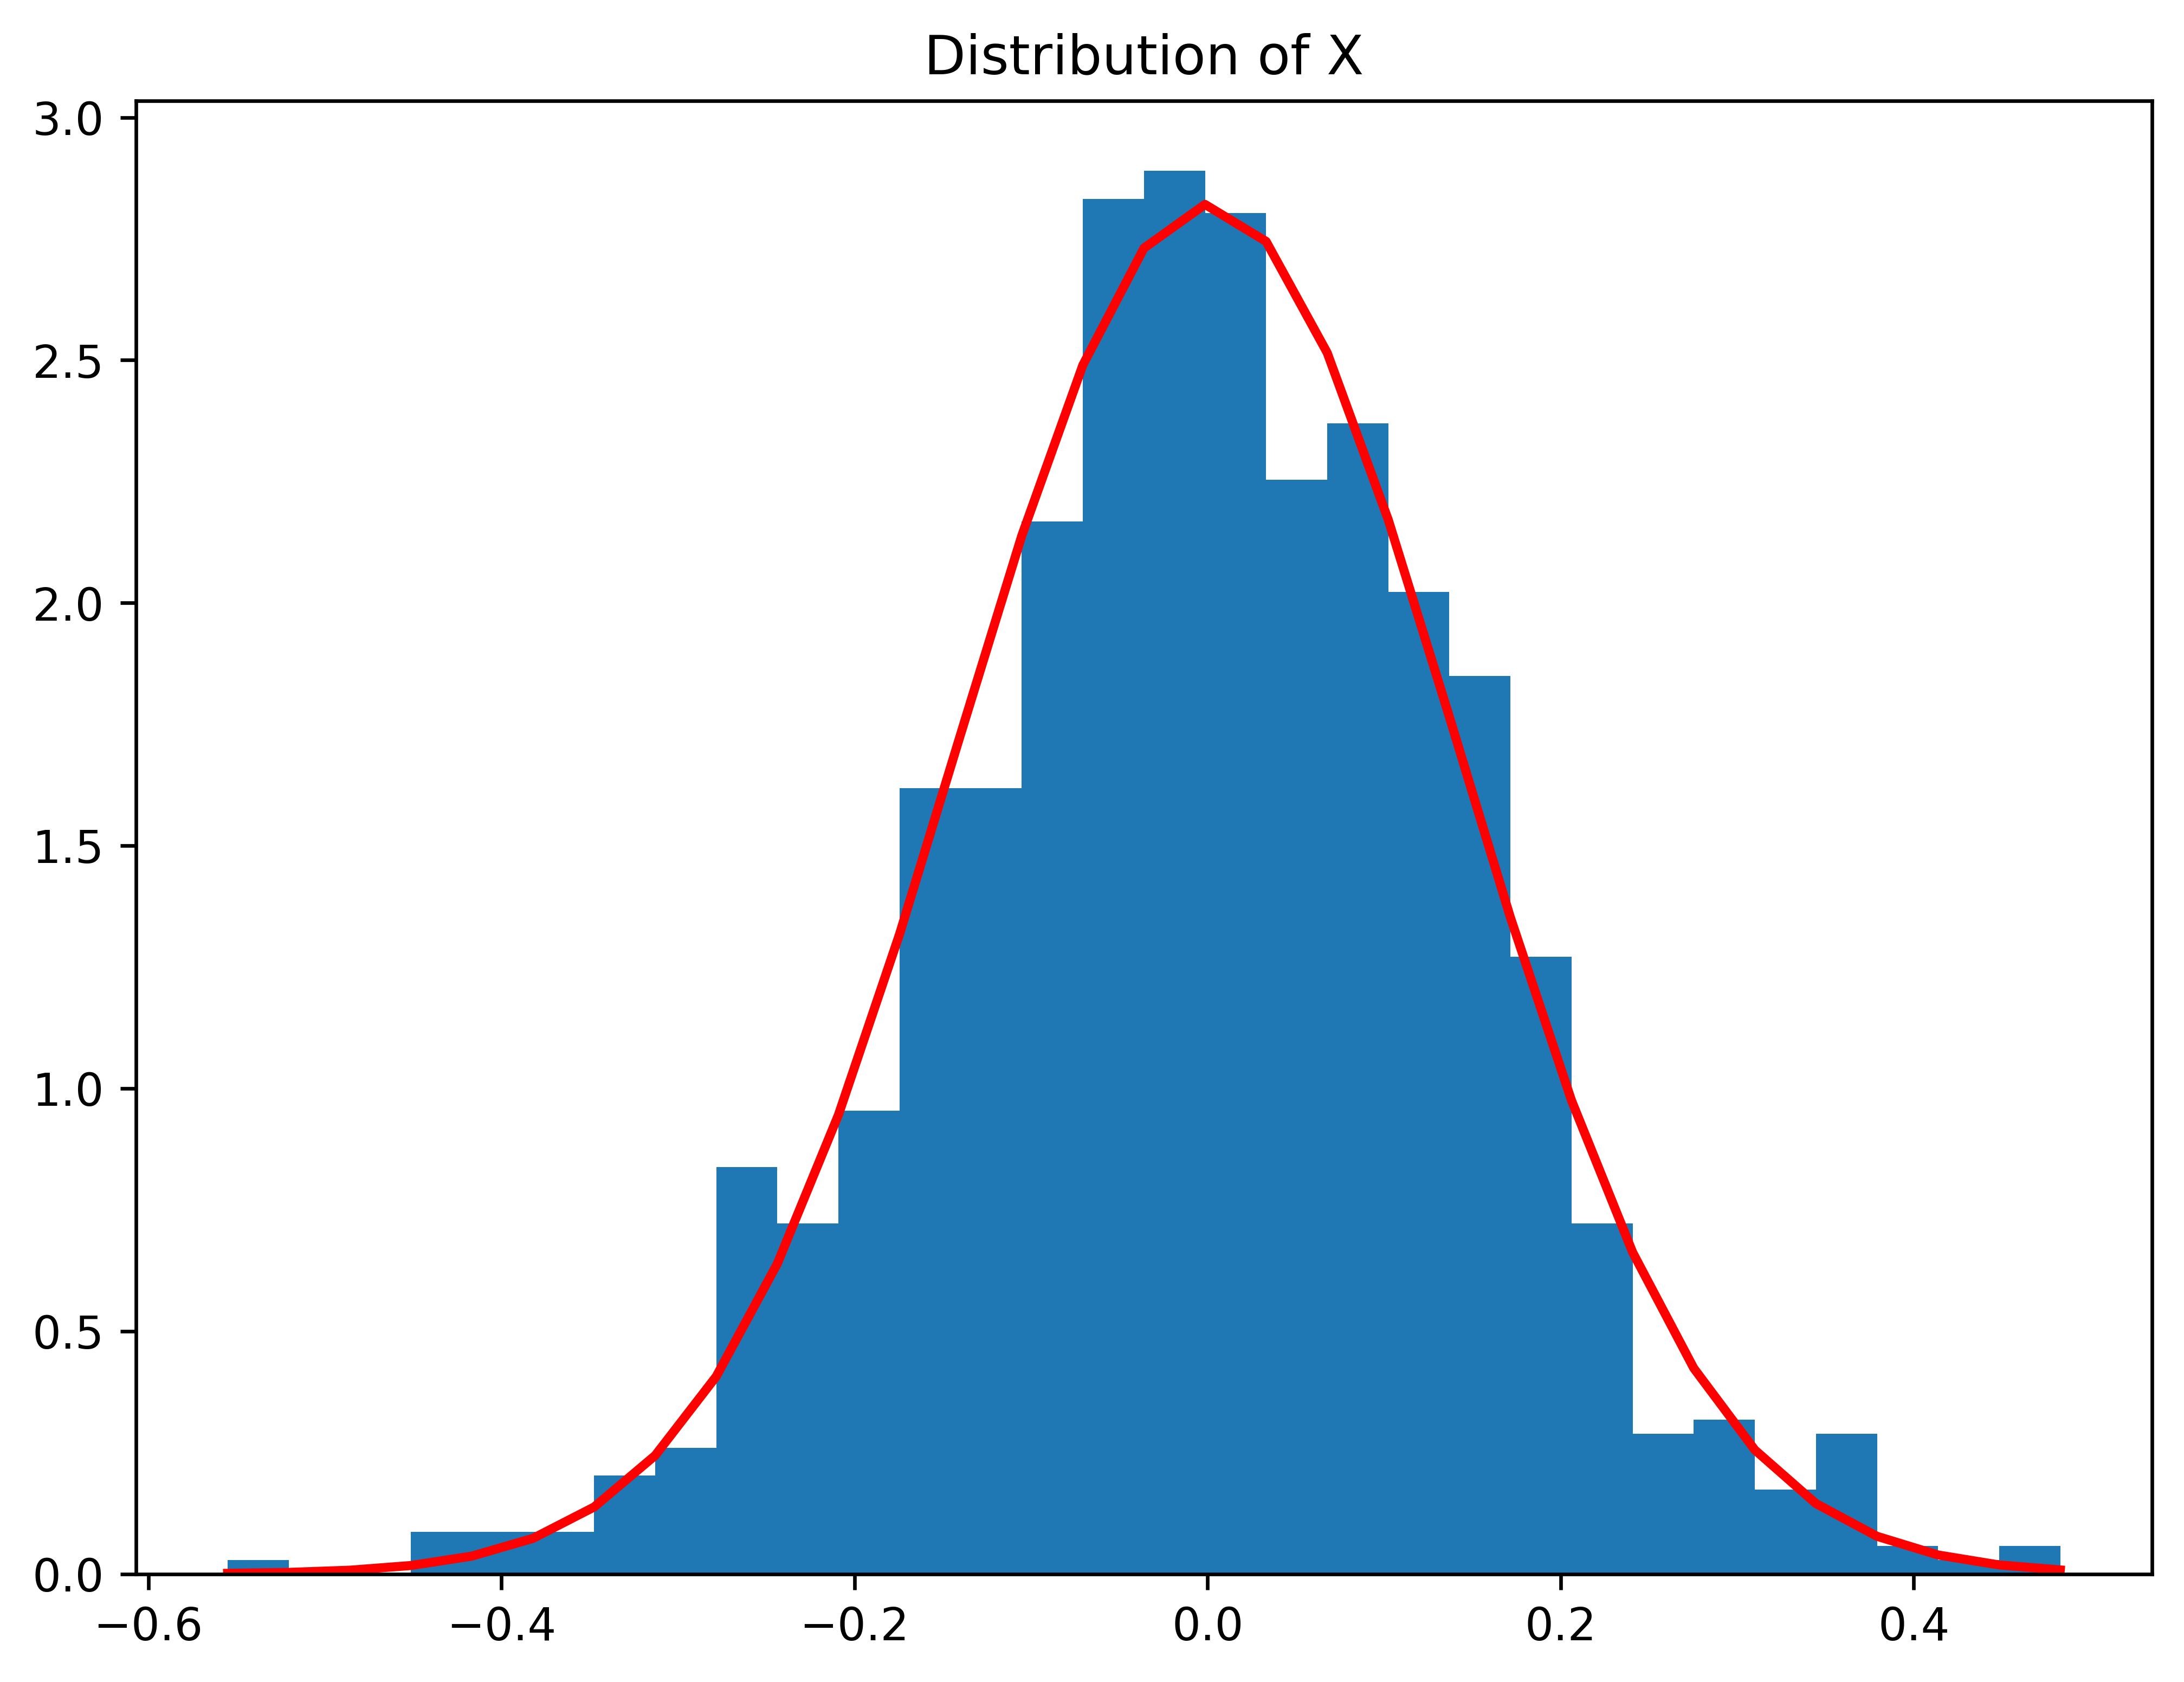

In [3]:
fig= plt.figure(figsize= (8,6), dpi=600)

count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/((0.02)**0.5 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * (0.02)) ),linewidth=2, color='r')

plt.title("Distribution of X")

In [4]:
fig= plt.figure(figsize= (8,6), dpi=600)

count, bins, ignored = plt.hist(e, 30, density=True)

plt.plot(bins, 1/((0.05)**0.5 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * (0.05)) ),
         linewidth=2, color='r')
plt.title("Distribution of e")

Text(0.5, 1.0, 'Distribution of e')

In [5]:
y= 0.5 + 3*x + e
y.shape

(1000,)

### 1) Plotting the data

Text(0.5, 0, 'x')

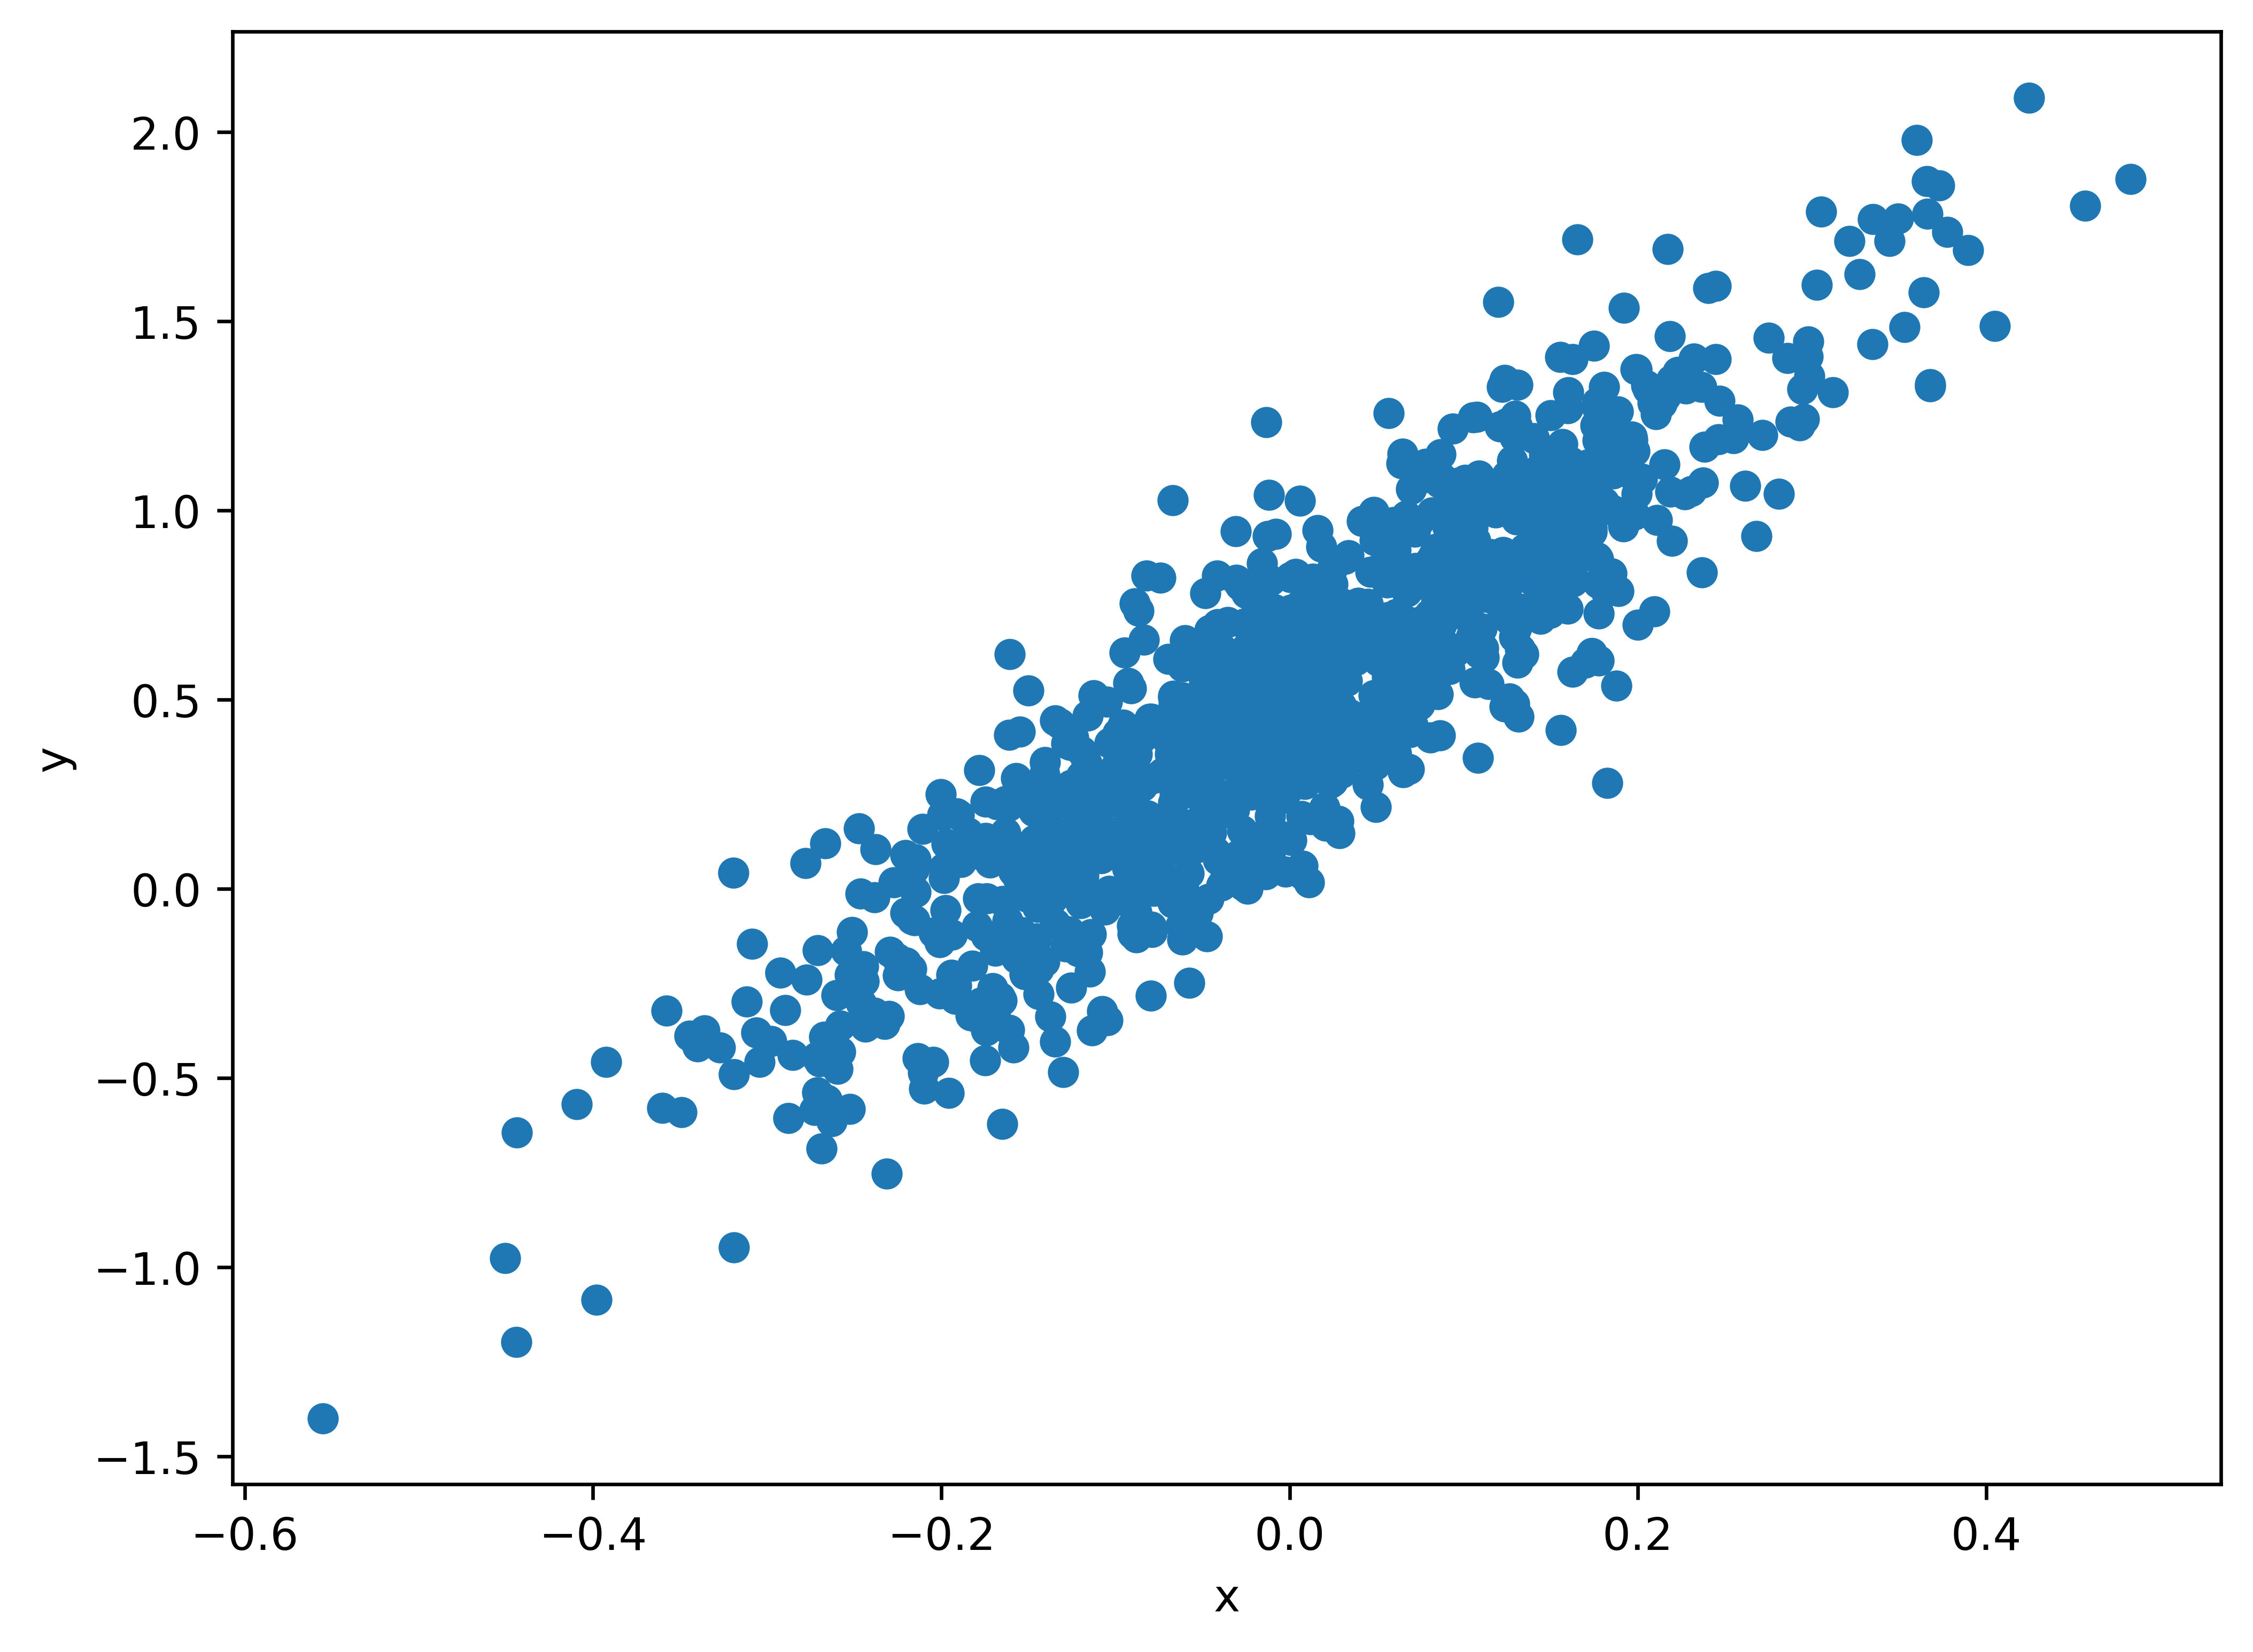

In [6]:
fig= plt.figure(figsize= (8,6), dpi=600)

plt.scatter(x,y)
plt.ylabel("y")
plt.xlabel("x")

### 2) plotting the least squares objective function

In [7]:
x= x.reshape((1000,1))
print(x.shape)
c= np.ones((1000,1))
print(c.shape)
X= np.concatenate((c, x), axis=1)
print(X.shape)

(1000, 1)
(1000, 1)
(1000, 2)


In [8]:
miu= np.linspace(-2, 2, 100)


In [9]:
beta= np.linspace(1, 5, 100)
res=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        s = miu[i]+np.dot(beta[j], x)
        res[i][j]= sum((y.reshape((1000,1)) - s)**2)
print(res.shape)

(100, 100)


In [10]:
%matplotlib notebook

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')

miu11, beta11= np.meshgrid(miu, beta)
print(miu11.shape, beta11.shape, res.shape)
ax.plot_surface(miu11, beta11, res)
ax.set_xlabel('miu')
ax.set_ylabel('Beta')
ax.set_zlabel('Least-square objective function')

<IPython.core.display.Javascript object>

(100, 100) (100, 100) (100, 100)


Text(0.5, 0, 'Least-square objective function')

In [16]:
a= np.matmul(X.T, X)
beta_final= np.matmul(np.linalg.inv(a), np.dot(X.T, y))
beta_final

array([0.50103004, 3.0908178 ])

From the plot above we can also see that the least-square objective function has its lowest value at beta equal to about 3 and miu equal to about 0.5.

### Difference between beta0 and miuo and best miu and beta

In [17]:
miu_best=beta_final[0]
beta_best=beta_final[1]
                    
print("miu_best=", beta_final[0], 'beta_best=', beta_final[1])
print("miu0=", miu0, "beta0=", beta0)

miu_best= 0.5010300358695797 beta_best= 3.090817795816206
miu0= 0.5 beta0= 3


So, we can see that there is small diferrence between miu0 and beta0 with the best estimated values for beta and miu.

In [18]:
%matplotlib inline

### Estimated regression line with the data

In [19]:
fig= plt.figure(figsize= (8,6), dpi=600)
plt.scatter(x, y, label="data points")
plt.plot(x, beta_best*x +  miu_best, color='red', label="estimated regression line")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()

### Plotting the residuals

In [20]:
fig= plt.figure(figsize= (8,6), dpi=600)

res=np.zeros((1000,))
# print(res)
for i in range(1000):
    res[i]= res[i]+ (y[i]- beta_best*x[i] -  miu_best)

# print(res)
plt.scatter(x, res)
plt.ylabel("Residuals")
plt.xlabel("x")


Text(0.5, 0, 'x')

Text(0.5, 1.0, 'The distribution of residuals')

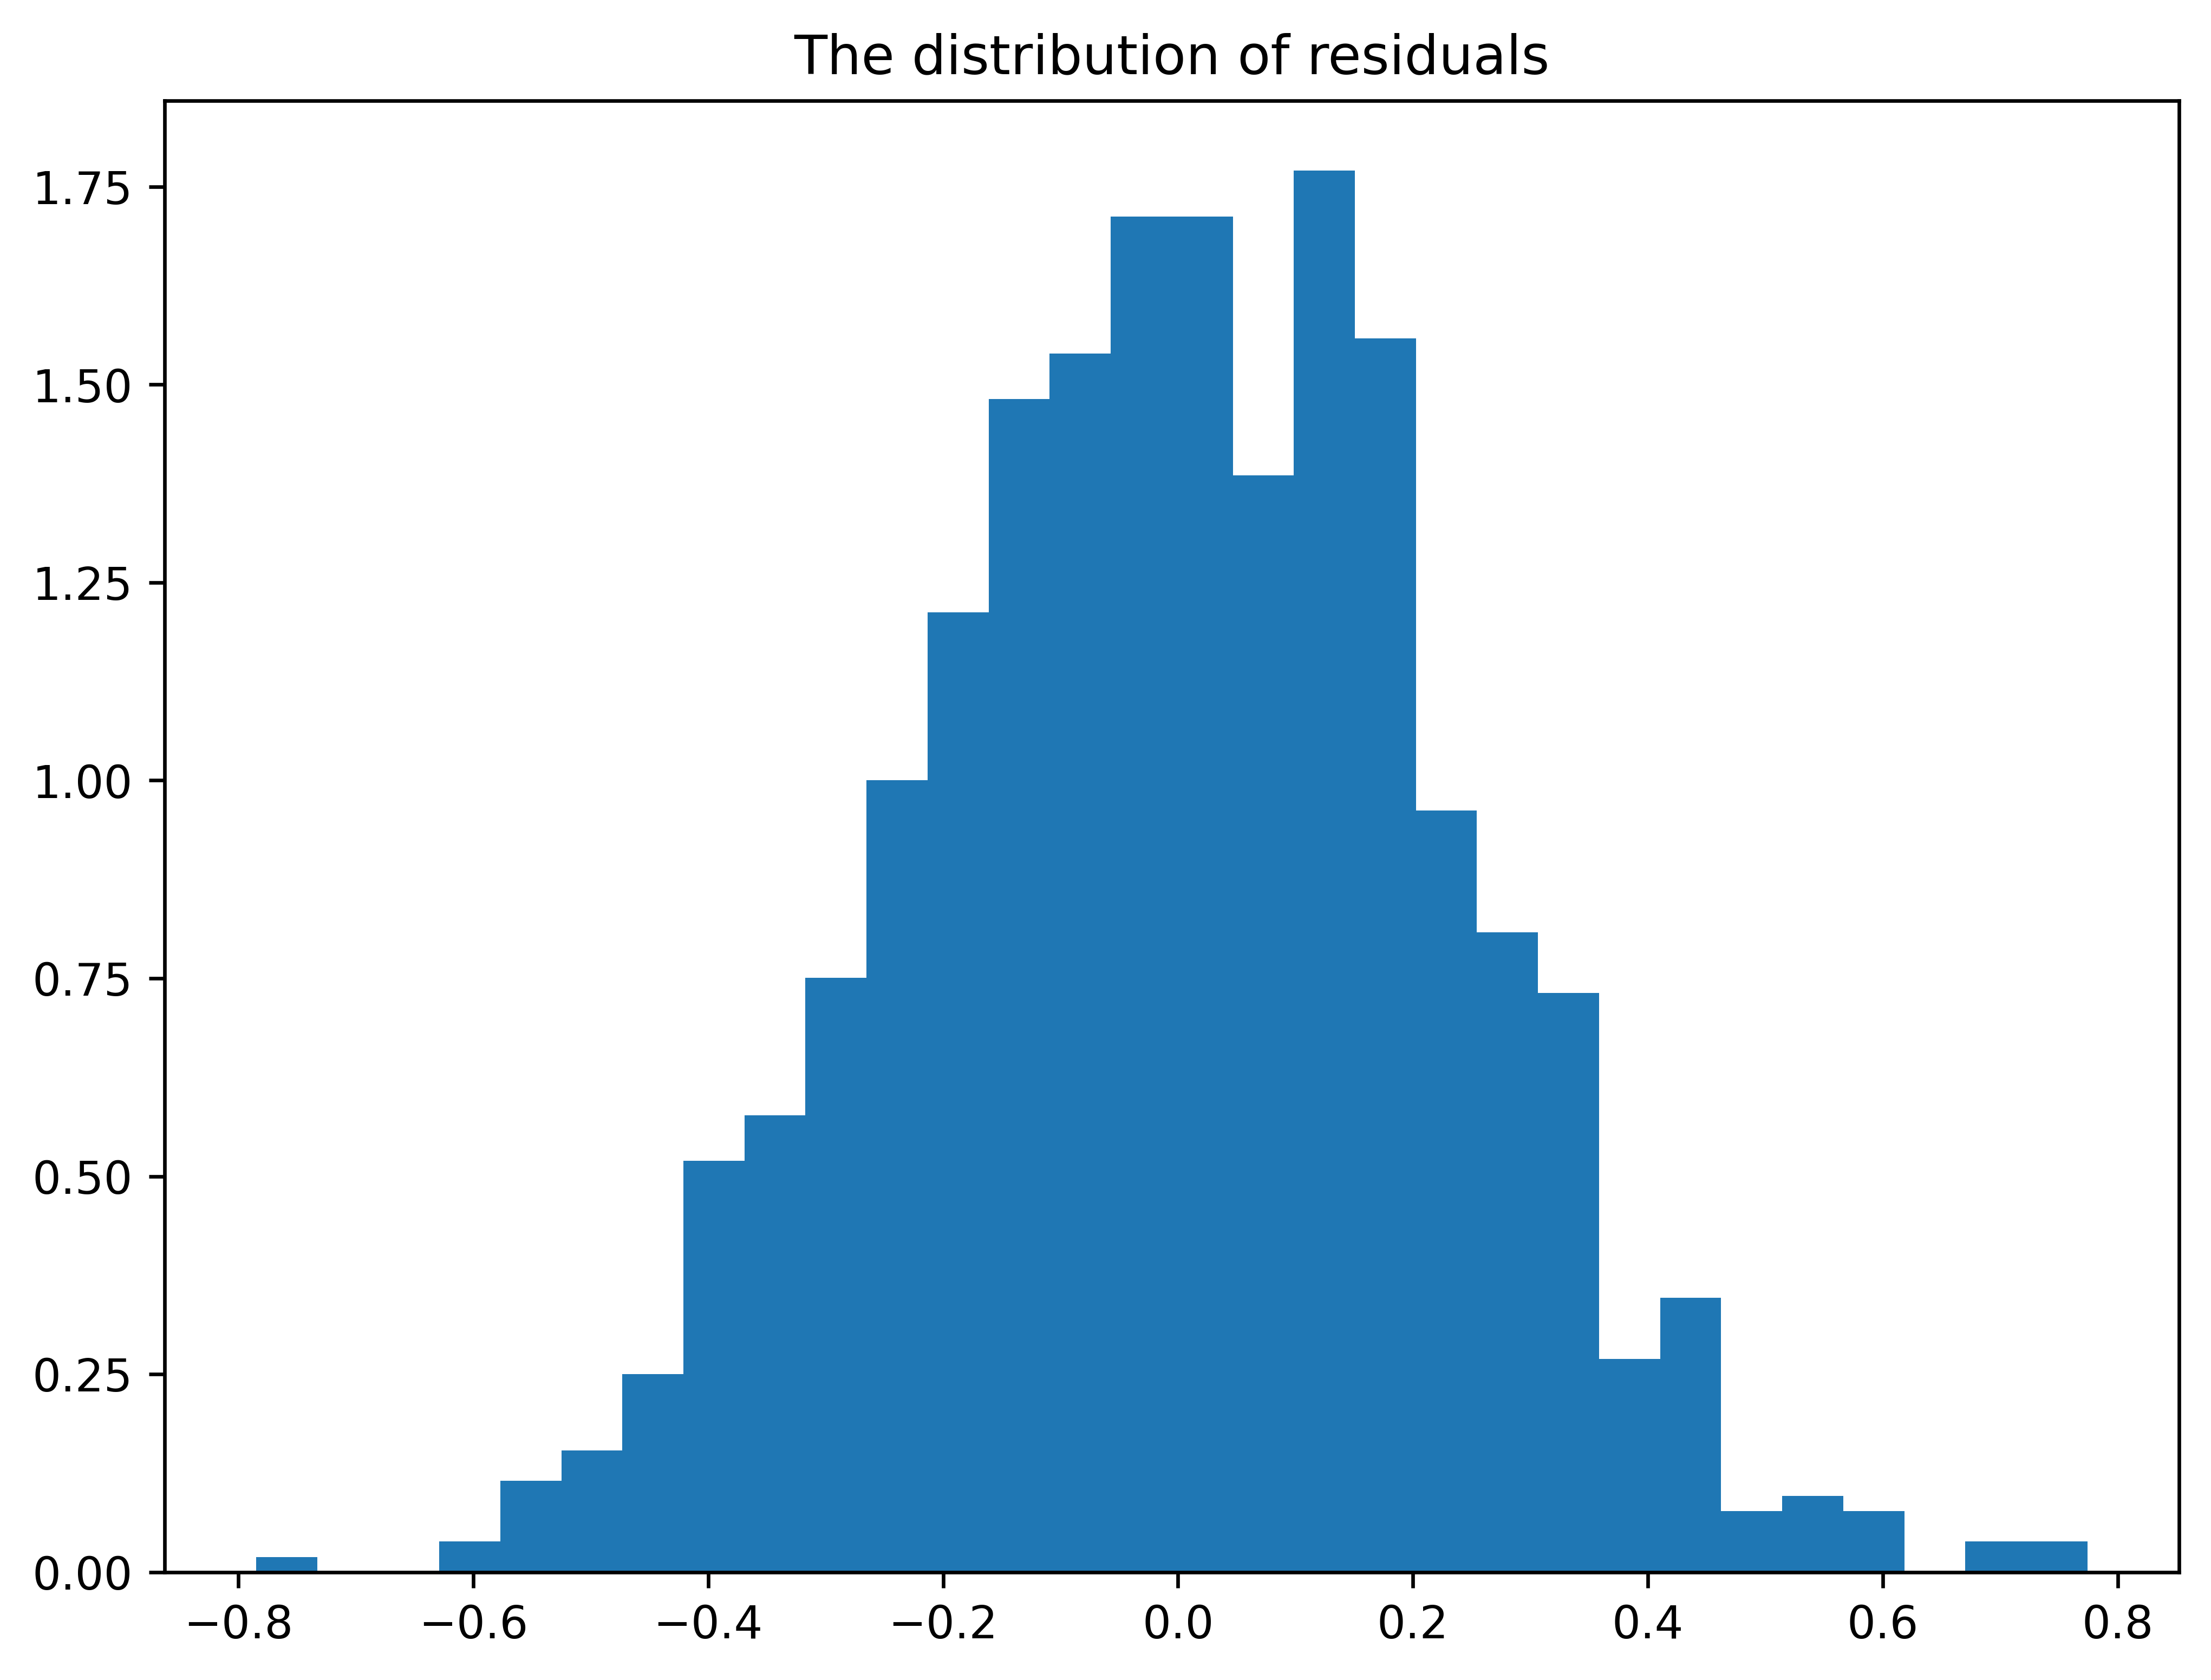

In [21]:
fig= plt.figure(figsize= (8,6), dpi=600)

count, bins, ignored = plt.hist(res, 30, density=True)

plt.title("The distribution of residuals")

### Some properties of projection matrices

### Idempotent matrix: 

Idempotent matrix is a square matrix, which if it is multiplied by itself, it will return the initial square matrix. 

For example, a matrix Px, when multiplied with itself, gives back the same matrix Px, so:  

If Px.Px= Px, we say that Px is an idempotent matrix. 

### Idempotent matrix properties:

1. The idempotent matrix is a square matrix.

2. The idempotent matrix has an equal number of rows and columns.

3. The idempotent matrix is a singular matrix.

4. The non-diagonal elements can be non-zero elements.

5. The eigenvalues of an idempotent matrix is either 0 or 1.

6. The trace of an idempotent matrix is equal to the rank of a matrix.

7. The trace of an idempotent matrix is always an integer.

### showing that the projection matrix (Px) is idempotent

In [22]:
A= np.dot((X.T),(X))
print(A.shape)
A_inv= np.linalg.inv(A)
print(A_inv.shape)
B= np.dot(X,A_inv)
print(B.shape)
Px= np.dot(B, X.T)
print(Px.shape)
print(Px)

(2, 2)
(2, 2)
(1000, 2)
(1000, 1000)
[[ 2.58347624e-03  2.95527278e-03  2.44532760e-04 ...  1.28979038e-03
   2.17113385e-04  4.91728960e-03]
 [ 2.95527278e-03  3.41436628e-03  6.71508080e-05 ...  1.35783249e-03
   3.32934275e-05  5.83706009e-03]
 [ 2.44532760e-04  6.71508080e-05  1.36042900e-03 ...  8.61742705e-04
   1.37351062e-03 -8.68915924e-04]
 ...
 [ 1.28979038e-03  1.35783249e-03  8.61742705e-04 ...  1.05303425e-03
   8.56724713e-04  1.71689921e-03]
 [ 2.17113385e-04  3.32934275e-05  1.37351062e-03 ...  8.56724713e-04
   1.38706703e-03 -9.36747464e-04]
 [ 4.91728960e-03  5.83706009e-03 -8.68915924e-04 ...  1.71689921e-03
  -9.36747464e-04  1.06908039e-02]]


In [23]:
PxPx= np.dot(Px, Px)
PxPx

array([[ 2.58347624e-03,  2.95527278e-03,  2.44532760e-04, ...,
         1.28979038e-03,  2.17113385e-04,  4.91728960e-03],
       [ 2.95527278e-03,  3.41436628e-03,  6.71508080e-05, ...,
         1.35783249e-03,  3.32934275e-05,  5.83706009e-03],
       [ 2.44532760e-04,  6.71508080e-05,  1.36042900e-03, ...,
         8.61742705e-04,  1.37351062e-03, -8.68915924e-04],
       ...,
       [ 1.28979038e-03,  1.35783249e-03,  8.61742705e-04, ...,
         1.05303425e-03,  8.56724713e-04,  1.71689921e-03],
       [ 2.17113385e-04,  3.32934275e-05,  1.37351062e-03, ...,
         8.56724713e-04,  1.38706703e-03, -9.36747464e-04],
       [ 4.91728960e-03,  5.83706009e-03, -8.68915924e-04, ...,
         1.71689921e-03, -9.36747464e-04,  1.06908039e-02]])

Since Px= Px.Px, I showed that Px is an idempotent matrix. 



### Trace of Px

In [24]:
Px_trace= Px.trace()
Px_trace

2.0

So, the trace of Px is equal to 2 and we know that Px rank is also 2.

So, it agrees with the properties of an idempotent matrix which is:

"The trace of an idempotent matrix is equal to the rank of a matrix.
and The trace of an idempotent matrix is always an integer."

### Showing that Px_inverse is an idempotent matrix

In [25]:
I= np.zeros((1000,1000))

for row in range(1000):
    for col in range(1000):
        if (row == col):
            I[row][col]= I[row][col] + 1
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [26]:
print(I.shape)
print(Px.shape)
Px_inv= np.subtract(I, Px)
Px_inv

(1000, 1000)
(1000, 1000)


array([[ 9.97416524e-01, -2.95527278e-03, -2.44532760e-04, ...,
        -1.28979038e-03, -2.17113385e-04, -4.91728960e-03],
       [-2.95527278e-03,  9.96585634e-01, -6.71508080e-05, ...,
        -1.35783249e-03, -3.32934275e-05, -5.83706009e-03],
       [-2.44532760e-04, -6.71508080e-05,  9.98639571e-01, ...,
        -8.61742705e-04, -1.37351062e-03,  8.68915924e-04],
       ...,
       [-1.28979038e-03, -1.35783249e-03, -8.61742705e-04, ...,
         9.98946966e-01, -8.56724713e-04, -1.71689921e-03],
       [-2.17113385e-04, -3.32934275e-05, -1.37351062e-03, ...,
        -8.56724713e-04,  9.98612933e-01,  9.36747464e-04],
       [-4.91728960e-03, -5.83706009e-03,  8.68915924e-04, ...,
        -1.71689921e-03,  9.36747464e-04,  9.89309196e-01]])

In [27]:
PP=np.dot( Px_inv , Px_inv)
PP

array([[ 9.97416524e-01, -2.95527278e-03, -2.44532760e-04, ...,
        -1.28979038e-03, -2.17113385e-04, -4.91728960e-03],
       [-2.95527278e-03,  9.96585634e-01, -6.71508080e-05, ...,
        -1.35783249e-03, -3.32934275e-05, -5.83706009e-03],
       [-2.44532760e-04, -6.71508080e-05,  9.98639571e-01, ...,
        -8.61742705e-04, -1.37351062e-03,  8.68915924e-04],
       ...,
       [-1.28979038e-03, -1.35783249e-03, -8.61742705e-04, ...,
         9.98946966e-01, -8.56724713e-04, -1.71689921e-03],
       [-2.17113385e-04, -3.32934275e-05, -1.37351062e-03, ...,
        -8.56724713e-04,  9.98612933e-01,  9.36747464e-04],
       [-4.91728960e-03, -5.83706009e-03,  8.68915924e-04, ...,
        -1.71689921e-03,  9.36747464e-04,  9.89309196e-01]])

Since Px_inv.Px_inv= Px_inv, I showed that Px_inv is also an idempotent matrix.

### Trace of Px_inv

In [28]:
trac_Px_inv= Px_inv.trace()
trac_Px_inv

998.0

The trace of an idempotent matrix is equal to its rank, so since the Px_inv matrix is idempotent and its rank is n-k= 1000-2=998, so this agrees with the properties of an idempotent matrix.

### eigenvalue decompositions of Px and Px_inv

In [29]:
eig_Px= np.linalg.eig(Px)
print(eig_Px)

(array([ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
        3.60533236e-17+0.00000000e+00j, -1.42399257e-17+2.93734614e-17j,
       -1.42399257e-17-2.93734614e-17j, -1.84117905e-17+2.36688534e-17j,
       -1.84117905e-17-2.36688534e-17j, -2.32252009e-17+1.82615573e-17j,
       -2.32252009e-17-1.82615573e-17j, -2.89050553e-17+6.87952218e-18j,
       -2.89050553e-17-6.87952218e-18j, -2.81633345e-17+0.00000000e+00j,
       -2.56668058e-17+1.24567345e-17j, -2.56668058e-17-1.24567345e-17j,
        9.12393817e-18+3.13963419e-17j,  9.12393817e-18-3.13963419e-17j,
       -3.75712955e-18+3.00015951e-17j, -3.75712955e-18-3.00015951e-17j,
       -8.12177197e-18+2.74062858e-17j, -8.12177197e-18-2.74062858e-17j,
        4.68938333e-18+2.96030491e-17j,  4.68938333e-18-2.96030491e-17j,
        1.30647962e-17+2.71614197e-17j,  1.30647962e-17-2.71614197e-17j,
        1.86019938e-17+2.25725623e-17j,  1.86019938e-17-2.25725623e-17j,
        2.41675189e-17+1.66679561e-17j,  2.4167518

In [30]:
eig_Px_inv= np.linalg.eig(Px_inv)
print(eig_Px_inv)

(array([1.00000000e+00+0.00000000e+00j, 9.20773934e-17+0.00000000e+00j,
       6.70679520e-17+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
       1.00000000e+00+0.00000000e+00j, 1.00000000e+00+0.00000000e+00j,
     

In [31]:
np.linalg.eig(I)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

So, we can see that eig_Px_inv= 1- eig_Px
Because Px_inv= I - Px, and as shown above the eigen value of I is equal to one, so the eigen value of Px_inv is equal to 1 - eigen value of Px, and since Px_inv and Px are both idempotent matrices and one of their properties is that the idempotent matrices have an eigen value of zero or one, we can say that if the eigen value of Px is one, the eigen value of Px_inv should be zero, and if eigen value of Px is zero, the eigen value of Px_inv is one. Thus, Px and Px_inv are orthogonal, because in indices were we have 1 in Px, we have zero in I-Px. so their inner product will be equal to zero, thereby they are orthogonal.